### Semantix - Desafio

Dataset: Bank Marketing

Importação das bibliotecas e informação sobre as versões utilizadas

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mtl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# exibição das versões utilizadas:
print("Versões: ")
print ("Python: {}".format(sys.version))
print ("Numpy: {}".format(np.__version__))
print ("Pandas: {}".format(pd.__version__))
print ("Seaborn: {}".format(sns.__version__))
print ("Matplotlib: {}".format(mtl.__version__))


Versões: 
Python: 3.6.7 (default, Feb 28 2019, 07:28:18) [MSC v.1900 64 bit (AMD64)]
Numpy: 1.18.1
Pandas: 0.25.3
Seaborn: 0.9.0
Matplotlib: 3.1.2


</br>
Importando os dados

In [3]:
# leitura dos dados
amostra = pd.read_csv('bank-full.csv', sep = ';')

In [4]:
print("Tamanho do df: ", amostra.shape)
print()
print("Nomes das colunas: ", amostra.columns)

Tamanho do df:  (45211, 17)

Nomes das colunas:  Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [5]:
amostra.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 1-Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

#### Resposta: A maior frequencia de emprestimos é da profissão 'blue-collar' e com maioria (80,7%) deles em housing

In [6]:
# seleciona as colunas job e emprestimos (residencia e pessoal)
amostra1 = amostra[['job','housing', 'loan']]

In [7]:
amostra2 = pd.get_dummies(amostra1[['housing', 'loan']])
amostra2.columns

Index(['housing_no', 'housing_yes', 'loan_no', 'loan_yes'], dtype='object')

In [8]:
dados = {'job': amostra1['job'], 'housing': amostra2['housing_yes'], 'loan': amostra2['loan_yes']}
amostra3 = pd.DataFrame(dados)
amostra3.head()

,job,housing,loan
0,management,1,0
1,technician,1,0
2,entrepreneur,1,1
3,blue-collar,1,0
4,unknown,0,0


In [9]:
byjob = amostra3.groupby('job').sum()
print('Tamanho do df: ', byjob.shape)
print('\n')
print(byjob.head())

Tamanho do df:  (12, 2)


              housing    loan
job                          
admin.         3182.0   991.0
blue-collar    7048.0  1684.0
entrepreneur    869.0   356.0
housemaid       398.0   152.0
management     4678.0  1253.0


In [10]:
# cria a coluna emprestimos: housing + loan
byjob['emprestimos'] = byjob.apply(lambda row: row.housing + row.loan, axis = 1)

# cria a coluna job
byjob['job'] = byjob.index

In [11]:
# ordena os valores
byjob = byjob.sort_values(by=['emprestimos'], ascending = False)
byjob.head()

,housing,loan,emprestimos,job
job,,,,
blue-collar,7048.0,1684.0,8732.0,blue-collar
management,4678.0,1253.0,5931.0,management
technician,4115.0,1309.0,5424.0,technician
admin.,3182.0,991.0,4173.0,admin.
services,2766.0,836.0,3602.0,services


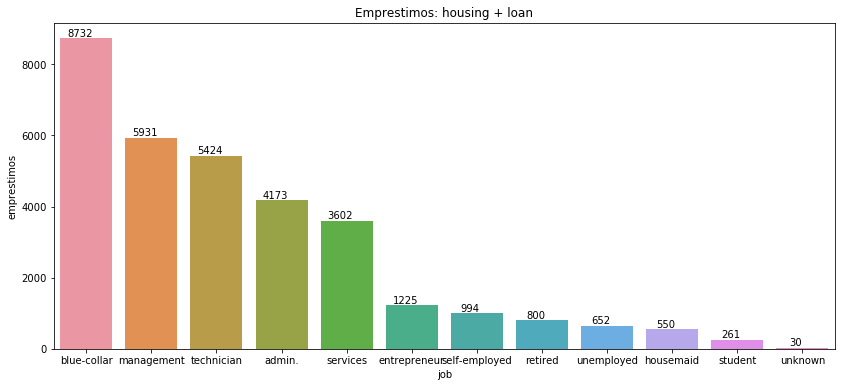

In [12]:
plt.figure(figsize=(14,6))
plt.title('Emprestimos: housing + loan')
graf_barra = sns.barplot(x='job',y='emprestimos',data=byjob)
for g in graf_barra.patches:
        graf_barra.annotate('{:.0f}'.format(g.get_height()), (g.get_x()+0.3, g.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

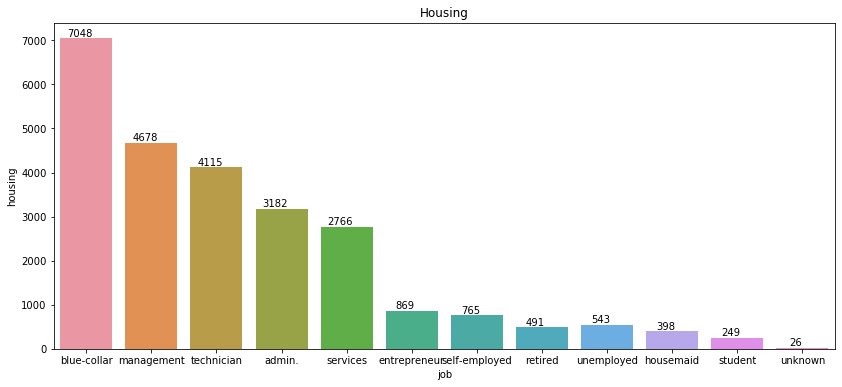

In [13]:
plt.figure(figsize=(14,6))
plt.title('Housing')
graf_barra2 = sns.barplot(x='job',y='housing',data=byjob)
for g in graf_barra2.patches:
        graf_barra2.annotate('{:.0f}'.format(g.get_height()), (g.get_x()+0.3, g.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

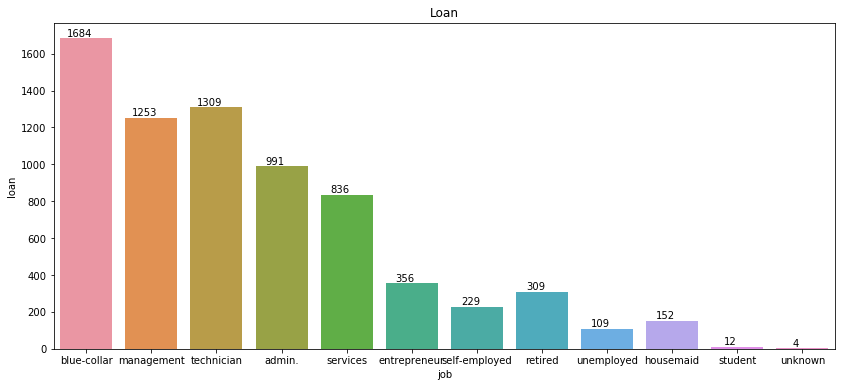

In [14]:
plt.figure(figsize=(14,6))
plt.title('Loan')
graf_barra2 = sns.barplot(x='job',y='loan',data=byjob)
for g in graf_barra2.patches:
        graf_barra2.annotate('{:.0f}'.format(g.get_height()), (g.get_x()+0.3, g.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

In [15]:
# seleciona a profissão (da quarta coluna, com indice [3]) com maior contagem de sim, ou seja, na primeira linha - indice[0]
maior_job = byjob.iloc[0,3]
emprestimo =  byjob.iloc[0,2]
housing = byjob.iloc[0,0]
loan = byjob.iloc[0,1]

In [16]:
top = byjob.iloc[0,]
top

housing               7048
loan                  1684
emprestimos           8732
job            blue-collar
Name: blue-collar, dtype: object

In [17]:
dados = {'tipo': top.index.tolist()[0:3], 'qtde': top.values.tolist()[0:3]}
df_graf = pd.DataFrame(dados)

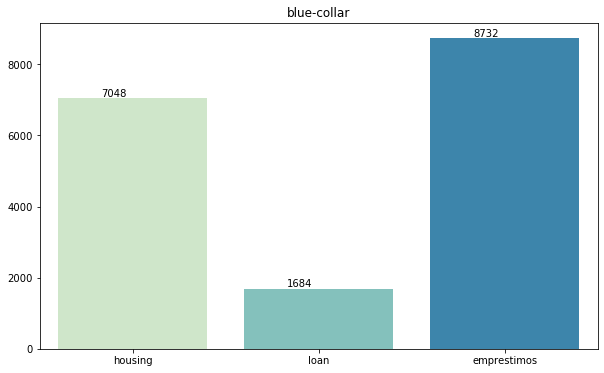

In [18]:
# plotando o grafico por tipo de emprestimo da profissão com mais emprestimos totais
plt.figure(figsize=(10,6))
plt.title(maior_job,)
graf_barra2 = sns.barplot(x = 'tipo', y='qtde', data=dados, palette = "GnBu")
for g in graf_barra2.patches:
        graf_barra2.annotate('{:.0f}'.format(g.get_height()), (g.get_x()+0.3, g.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

### 2-Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?
#### Resposta: A correlação entre a quantidade de contatos e o sucesso (ou não) da campanha é bastante fraco quando analisados isoladamente.

In [19]:
amostra2 = amostra[['y', 'contact', 'campaign', 'previous']]

In [20]:
amostra2.head()

,y,contact,campaign,previous
0,no,unknown,1,0
1,no,unknown,1,0
2,no,unknown,1,0
3,no,unknown,1,0
4,no,unknown,1,0


In [21]:
print("contact: ", amostra2['contact'].unique())
print()
print("campaign: ", amostra2['campaign'].unique())
print()
print("previous: ", amostra2['previous'].unique())

contact:  ['unknown' 'cellular' 'telephone']

campaign:  [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]

previous:  [  0   3   1   4   2  11  16   6   5  10  12   7  18   9  21   8  14  15
  26  37  13  25  20  27  17  23  38  29  24  51 275  22  19  30  58  28
  32  40  55  35  41]


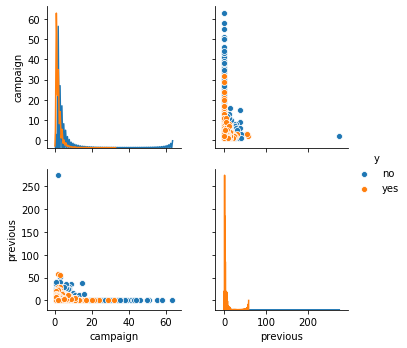

In [22]:
sns.pairplot(amostra2, hue='y')

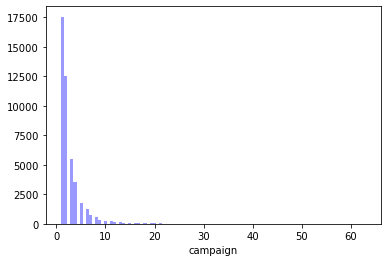

In [23]:
sns.distplot(amostra2['campaign'], kde=False, color='blue', bins=100)

In [24]:
amostra2_1 = pd.get_dummies(amostra2['y'])

In [25]:
amostra2_1 = pd.concat([amostra2,amostra2_1],axis=1)
amostra2_1.head()

,y,contact,campaign,previous,no,yes
0,no,unknown,1,0,1,0
1,no,unknown,1,0,1,0
2,no,unknown,1,0,1,0
3,no,unknown,1,0,1,0
4,no,unknown,1,0,1,0


In [26]:
amostra2_1.groupby('y').sum()

,campaign,previous,no,yes
y,,,,
no,113632,20047,39922.0,0.0
yes,11324,6190,0.0,5289.0


In [27]:
amostra2.head()

,y,contact,campaign,previous
0,no,unknown,1,0
1,no,unknown,1,0
2,no,unknown,1,0
3,no,unknown,1,0
4,no,unknown,1,0


Verificando se existe correlação linear (Pearson)

In [28]:
# utilizando correlação linear (Pearson)
amostra2_1.corr()

,campaign,previous,no,yes
campaign,1.000000,-0.032855,0.073172,-0.073172
previous,-0.032855,1.000000,-0.093236,0.093236
no,0.073172,-0.093236,1.000000,-1.000000
yes,-0.073172,0.093236,-1.000000,1.000000


In [29]:
# utilizando correlação linear (Pearson)
amostra2_1.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('viridis'), axis=1)

,campaign,previous,no,yes
campaign,1.0,-0.033,0.073,-0.073
previous,-0.033,1.0,-0.093,0.093
no,0.073,-0.093,1.0,-1.0
yes,-0.073,0.093,-1.0,1.0


</br>
Verificando se existe correlação não-linear (Spearman)

In [30]:
# utilizando correlação não-linear (Spearman)
amostra2_1.corr(method='spearman')

,campaign,previous,no,yes
campaign,1.000000,-0.108448,0.084054,-0.084054
previous,-0.108448,1.000000,-0.169124,0.169124
no,0.084054,-0.169124,1.000000,-1.000000
yes,-0.084054,0.169124,-1.000000,1.000000


In [31]:
# utilizando correlação não-linear (Spearman)
amostra2_1.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('cividis'), axis=1)

,campaign,previous,no,yes
campaign,1.0,-0.11,0.084,-0.084
previous,-0.11,1.0,-0.17,0.17
no,0.084,-0.17,1.0,-1.0
yes,-0.084,0.17,-1.0,1.0


A correlação entre a quantidade de contatos e o sucesso (ou não) da campanha é bastante fraco quando analisados isoladamente.

### 3-Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

#### Resposta: Foram 2,14 contatos em média e, conforme a distribuição do histograma, recomendaria, no máximo, 6 contatos por cliente.

In [32]:
amostra3 = amostra

In [33]:
amostra3_1 = amostra3[amostra3['y']=='yes']
amostra3_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [34]:
print()
print('\nO número médio de contatos nessa campanha: ', amostra3_1['campaign'].mean())
print()



O número médio de contatos nessa campanha:  2.1410474569861977



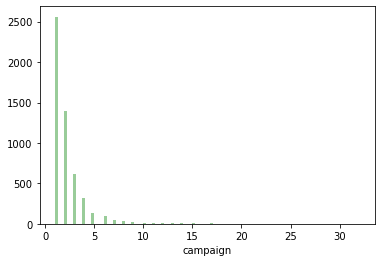

In [35]:
sns.distplot(amostra3_1['campaign'], kde=False, color='green', bins=100)

### 4-O resultado da campanha anterior tem relevância na campanha atual?
#### Resposta: A covariância mostra que existe uma pequena relação linear entre os sucessos obtidos na campanha anterior e na atual. A relevância é fraca (0,31) entre as variáveis, porém não é desprezível.</br>


In [36]:
amostra4 = amostra
print(amostra4.shape)
amostra4.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [37]:
amostra4_1 = pd.get_dummies(amostra4[['poutcome', 'y']])
amostra4_1 = pd.concat([amostra4,amostra4_1],axis=1)
amostra4_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,0,0,0,1,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,0,0,0,1,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,0,0,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,0,0,0,1,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,0,0,0,1,1,0


In [38]:
amostra4_2 = amostra4_1[['campaign', 'previous', 'poutcome_success', 'y_yes']]

In [39]:
print('Shape: ', amostra4_2.shape)
amostra4_2.head()

Shape:  (45211, 4)


,campaign,previous,poutcome_success,y_yes
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


D:\SW_instalado\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\SW_instalado\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


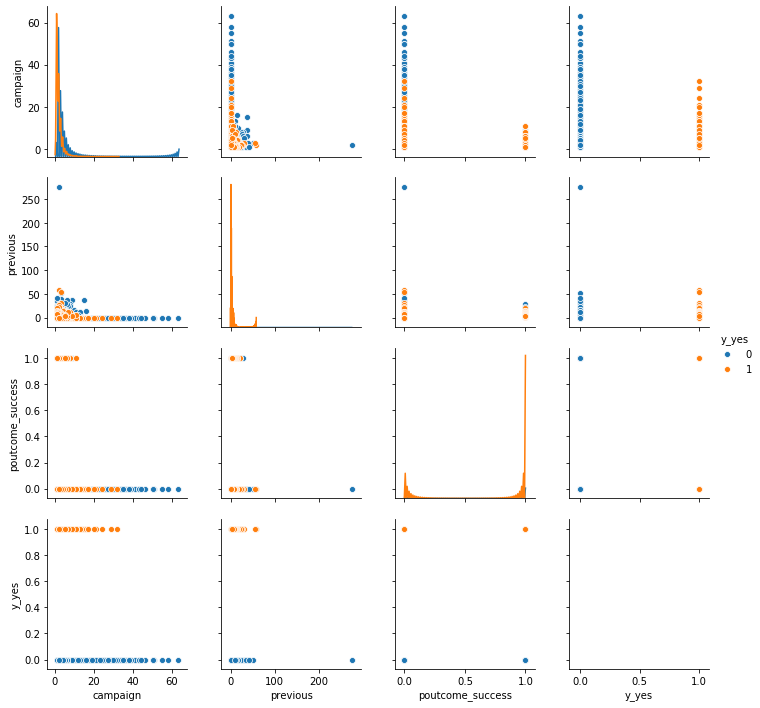

In [40]:
sns.pairplot(amostra4_2, hue='y_yes')

In [41]:
amostra4_2.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('viridis'), axis=1)

,campaign,previous,poutcome_success,y_yes
campaign,1.0,-0.033,-0.057,-0.073
previous,-0.033,1.0,0.2,0.093
poutcome_success,-0.057,0.2,1.0,0.31
y_yes,-0.073,0.093,0.31,1.0


In [42]:
amostra4_2.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('cividis'), axis=1)

,campaign,previous,poutcome_success,y_yes
campaign,1.0,-0.11,-0.074,-0.084
previous,-0.11,1.0,0.39,0.17
poutcome_success,-0.074,0.39,1.0,0.31
y_yes,-0.084,0.17,0.31,1.0


In [43]:
amostra4_2.cov()

,campaign,previous,poutcome_success,y_yes
campaign,9.597733,-0.234459,-0.032010,-0.072859
previous,-0.234459,5.305841,0.083392,0.069026
poutcome_success,-0.032010,0.083392,0.032305,0.017723
y_yes,-0.072859,0.069026,0.017723,0.103302


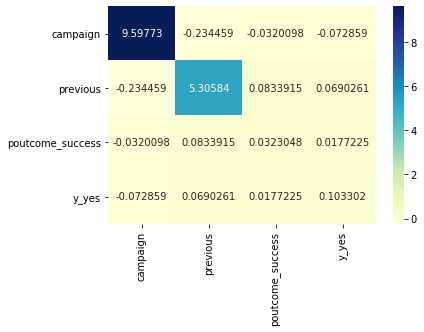

In [44]:
sns.heatmap(amostra4_2.cov(), annot=True, fmt='g', cmap="YlGnBu")
plt.show()

### 5-Qual o fator determinante para que o banco exija um seguro de crédito?
#### Resposta: os fatores relacionados ao perfil do cliente são:
    . balance:  51,1%
    . age: 25,6%
    . job: 11,1%
    . education: 4,8%
    . marital:  3,8%
    . housing:  2,1%
    . loan: 1,6%
</br>


In [45]:
amostra5 = amostra.drop(['contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'], axis = 1)
amostra5.head()

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no


In [46]:
amostra5_1 = pd.get_dummies(amostra5[['default','housing', 'loan']])
amostra5_1 = pd.concat([amostra5, amostra5_1], axis =1)

In [47]:
amostra5_1.head()

,age,job,marital,education,default,balance,housing,loan,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,management,married,tertiary,no,2143,yes,no,1,0,0,1,1,0
1,44,technician,single,secondary,no,29,yes,no,1,0,0,1,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,0,0,1,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,1,0,0,1,1,0
4,33,unknown,single,unknown,no,1,no,no,1,0,1,0,1,0


In [48]:
amostra5_1 = amostra5_1.drop(['housing', 'housing_no', 'default', 'default_no', 'loan', 'loan_no'], axis=1)
amostra5_1.head()

,age,job,marital,education,balance,default_yes,housing_yes,loan_yes
0,58,management,married,tertiary,2143,0,1,0
1,44,technician,single,secondary,29,0,1,0
2,33,entrepreneur,married,secondary,2,0,1,1
3,47,blue-collar,married,unknown,1506,0,1,0
4,33,unknown,single,unknown,1,0,0,0


In [49]:
print('Education: ', amostra5_1['education'].unique())
print('Marital: ', amostra5_1['marital'].unique())

Education:  ['tertiary' 'secondary' 'unknown' 'primary']
Marital:  ['married' 'single' 'divorced']


In [50]:
amostra5_1['edu_number'] = [1 if row == 'primary' else 
                            2 if row == 'secondary' else 
                            3 if row=='tertiary' else 0 
                            for row in amostra5_1['education']]


amostra5_1['marital_number'] = [0 if row=='divorced' else 
                               1 if row=='single' else 2 
                               for row in amostra5_1['marital']]


In [51]:
amostra5_1 = amostra5_1.drop(['marital', 'education'], axis = 1)

In [52]:
lista_job = amostra5_1['job'].unique().tolist()
num_job = np.arange(0, len(lista_job)).tolist()
df_job = pd.DataFrame(list(zip(lista_job,num_job)), columns = ['job', 'job_number'])
df_job

,job,job_number
0,management,0
1,technician,1
2,entrepreneur,2
3,blue-collar,3
4,unknown,4
5,retired,5
6,admin.,6
7,services,7
8,self-employed,8
9,unemployed,9


In [53]:
amostra5_2 = pd.merge(amostra5_1, df_job, on='job')
amostra5_2 = amostra5_2.drop('job', axis=1)

In [54]:
amostra5_2.head()

,age,balance,default_yes,housing_yes,loan_yes,edu_number,marital_number,job_number
0,58,2143,0,1,0,3,2,0
1,35,231,0,1,0,3,2,0
2,28,447,0,1,1,3,1,0
3,56,779,0,1,0,3,2,0
4,39,255,0,1,0,3,1,0


</br>
Para verificar a importancia das variaveis de perfil dos clientes será utilizada a análise por árvores.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [56]:
X = amostra5_2.drop('default_yes', axis=1).values
y = amostra5_2['default_yes'].values
pp= amostra5_2.drop('default_yes', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
feature_importances = pd.DataFrame(rfc.feature_importances_,index = pp.columns,
                                   columns=['importancia']).sort_values('importancia',ascending=False)

In [57]:
feature_importances

,importancia
balance,0.516086
age,0.252339
job_number,0.112357
edu_number,0.047637
marital_number,0.036188
housing_yes,0.020815
loan_yes,0.014578


### 6-Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?
#### Resposta: 
    . 60,97% do total são casados</br>
    . 55,85% do total tem o segundo grau</br>
    . embora a faixa etária com maior percentual é a de 32 a 37 anos, com 28,91%, os percentuais estão bem divididos nas categorias.</br>

In [58]:
amostra6 = amostra.drop(['contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'], axis = 1)

In [59]:
amostra6_1 = pd.get_dummies(amostra6[['housing', 'loan','default']])
amostra6_1 = pd.concat([amostra6,amostra6_1],axis=1)
amostra6_1.head()

,age,job,marital,education,default,balance,housing,loan,housing_no,housing_yes,loan_no,loan_yes,default_no,default_yes
0,58,management,married,tertiary,no,2143,yes,no,0,1,1,0,1,0
1,44,technician,single,secondary,no,29,yes,no,0,1,1,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,0,1,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,0,1,1,0,1,0
4,33,unknown,single,unknown,no,1,no,no,1,0,1,0,1,0


In [60]:
amostra6_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'default_no', 'default_yes'],
      dtype='object')

In [61]:
amostra6_1 = amostra6_1.drop(columns=['default', 'balance', 'housing', 'loan', 'housing_no','loan_no','default_no'], axis=1)

In [62]:
print('Education: ', amostra6_1['education'].unique())
print('Marital: ', amostra6_1['marital'].unique())

Education:  ['tertiary' 'secondary' 'unknown' 'primary']
Marital:  ['married' 'single' 'divorced']


In [63]:
amostra6_1['edu_number'] = [1 if row == 'primary' else 
                            2 if row == 'secondary' else 
                            3 if row=='tertiary' else 0 
                            for row in amostra6_1['education']]


amostra6_1['marital_number'] = [0 if row=='divorced' else 
                               1 if row=='single' else 2 
                               for row in amostra6_1['marital']]


In [64]:
amostra6_1 = amostra6_1.drop(['marital', 'education'], axis = 1)

In [65]:
amostra6_2 = amostra6_1[amostra6_1['housing_yes']==1]
amostra6_2.head()

,age,job,housing_yes,loan_yes,default_yes,edu_number,marital_number
0,58,management,1,0,0,3,2
1,44,technician,1,0,0,2,1
2,33,entrepreneur,1,1,0,2,2
3,47,blue-collar,1,0,0,0,2
5,35,management,1,0,0,3,2


In [66]:
def faixa_idade(n):
    if (n < 21):
        saida = 'menor que 21'
    elif (n < 32):
        saida = 'entre 21 e 31'
    elif (n < 38):
        saida = 'entre 32 e 37'
    elif (n< 46):
        saida = 'entre 38 e 45'
    else:
        saida = 'maior que 45'
    
    return(saida)

In [67]:
amostra6_2['age_range'] = amostra6_2['age'].apply(faixa_idade)

D:\SW_instalado\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


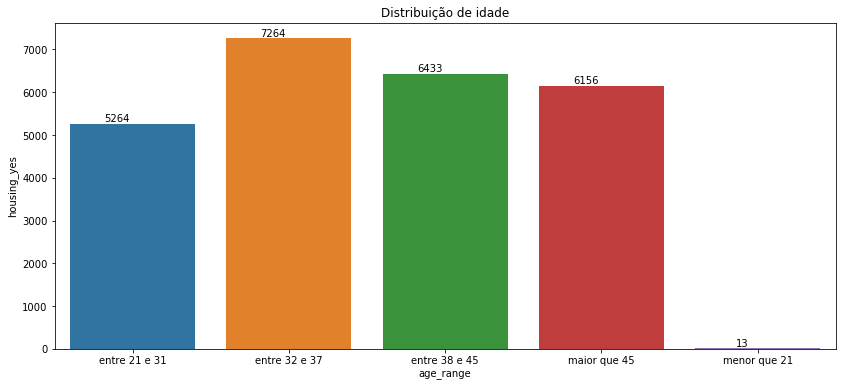

In [69]:
byjob6_21 = amostra6_2.groupby('age_range').sum()
byjob6_21['age_range'] = byjob6_21.index

plt.figure(figsize=(14,6))
plt.title('Distribuição de idade')
graf_barra = sns.barplot(x='age_range',y='housing_yes',data=byjob6_21)
for g in graf_barra.patches:
        graf_barra.annotate('{:.0f}'.format(g.get_height()), (g.get_x()+0.3, g.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

In [70]:
titulo = byjob6_21['housing_yes'].index.tolist()
valores = byjob6_21['housing_yes'].tolist()
soma = sum(valores)

val_perc = []

for i in valores:
    val_perc.append(round((float(i)/soma)*100, 2))

val_perc    

df6 = pd.DataFrame([titulo, val_perc])    
df6

,0,1,2,3,4
0,entre 21 e 31,entre 32 e 37,entre 38 e 45,maior que 45,menor que 21
1,20.95,28.91,25.6,24.5,0.05


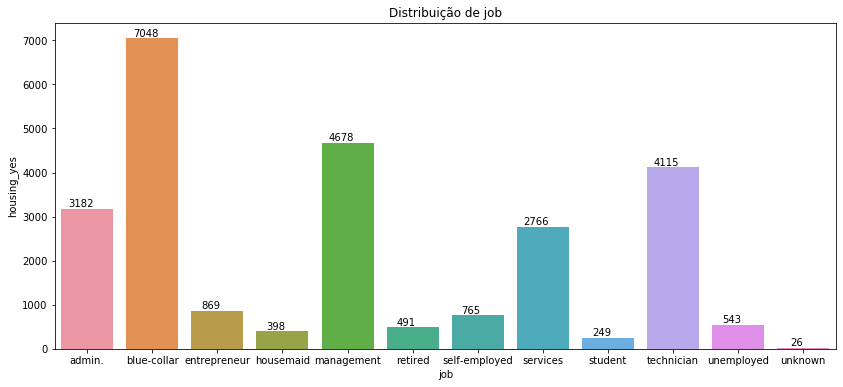

In [71]:
byjob6_22 = amostra6_2.groupby('job').sum()
byjob6_22['job'] = byjob6_22.index

plt.figure(figsize=(14,6))
plt.title('Distribuição de job')
graf_barra = sns.barplot(x='job',y='housing_yes',data=byjob6_22)
for g in graf_barra.patches:
        graf_barra.annotate('{:.0f}'.format(g.get_height()), (g.get_x()+0.3, g.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

In [72]:
titulo = byjob6_22['housing_yes'].index.tolist()
valores = byjob6_22['housing_yes'].tolist()
soma = sum(valores)

val_perc = []

for i in valores:
    val_perc.append(round((float(i)/soma)*100, 2))

val_perc    

df6_1 = pd.DataFrame([titulo, val_perc])    
df6_1

,0,1,2,3,4,5,6,7,8,9,10,11
0,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
1,12.66,28.05,3.46,1.58,18.62,1.95,3.04,11.01,0.99,16.37,2.16,0.1


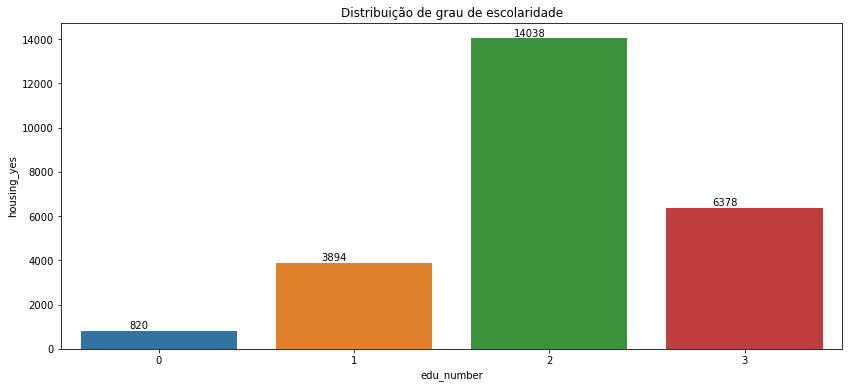

In [73]:
byjob6_23 = amostra6_2.groupby('edu_number').sum()
byjob6_23['edu_number'] = byjob6_23.index

plt.figure(figsize=(14,6))
plt.title('Distribuição de grau de escolaridade')
graf_barra = sns.barplot(x='edu_number',y='housing_yes',data=byjob6_23)
for g in graf_barra.patches:
        graf_barra.annotate('{:.0f}'.format(g.get_height()), (g.get_x()+0.3, g.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

In [74]:
titulo = byjob6_23['housing_yes'].index.tolist()
valores = byjob6_23['housing_yes'].tolist()
soma = sum(valores)

val_perc = []

for i in valores:
    val_perc.append(round((float(i)/soma)*100, 2))

val_perc    

df6_23 = pd.DataFrame([titulo, val_perc])    
df6_23

,0,1,2,3
0,0.00,1.0,2.00,3.00
1,3.26,15.5,55.86,25.38


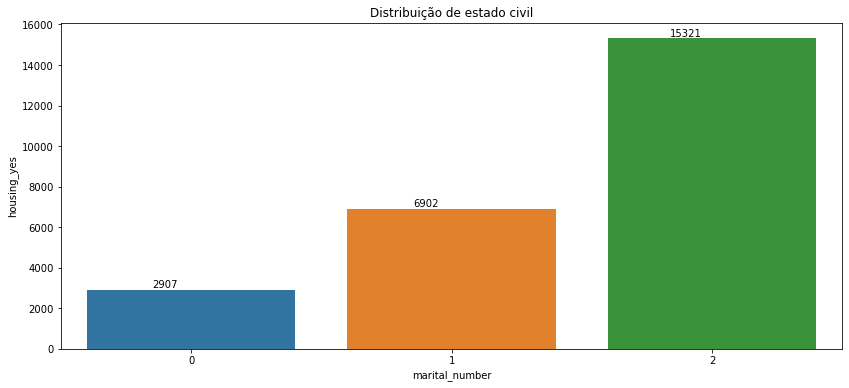

In [75]:
byjob6_24 = amostra6_2.groupby('marital_number').sum()
byjob6_24['marital_number'] = byjob6_24.index

plt.figure(figsize=(14,6))
plt.title('Distribuição de estado civil')
graf_barra = sns.barplot(x='marital_number',y='housing_yes',data=byjob6_24)
for g in graf_barra.patches:
        graf_barra.annotate('{:.0f}'.format(g.get_height()), (g.get_x()+0.3, g.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

In [76]:
titulo = byjob6_24['housing_yes'].index.tolist()
valores = byjob6_24['housing_yes'].tolist()
soma = sum(valores)

val_perc = []

for i in valores:
    val_perc.append(round((float(i)/soma)*100, 2))

val_perc    

df6_24 = pd.DataFrame([titulo, val_perc])    
df6_24

,0,1,2
0,0.00,1.00,2.00
1,11.57,27.47,60.97
